# Clustering hierárquico

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [2]:
# Carrega o dataset
df = pd.read_csv("../bases/shopping_data.csv", sep = ",")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Linhas, Colunas:",df.shape)

Linhas, Colunas: (200, 5)


Esse conjunto de dados possui recursos como um ID associado a cada um dos 200 clientes, o sexo binário, a idade da pessoa, a renda anual (em milhares de dólares) e uma pontuação associada à frequência com que um cliente gasta dinheiro em compras. 100 sendo o cliente que mais gasta.

Vamos tentar agrupar os clientes usando apenas dois recursos do conjunto de dados: sua receita anual e a pontuação de despesas.

In [11]:
# Uma matriz com as ultimas colunas do dataframe
matriz_df = df.iloc[:,3:5].values

matriz_df[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [12]:
# Paquete de scipy para 'dendograma'
import scipy.cluster.hierarchy as shc

Vamos fazer um dendrograma do conjunto de dados usando o método 'ward' para calcular distâncias (é o que geralmente é usado e vem por padrão). Esse método minimiza a variação dentro de um cluster e maximiza a variação entre os clusters.

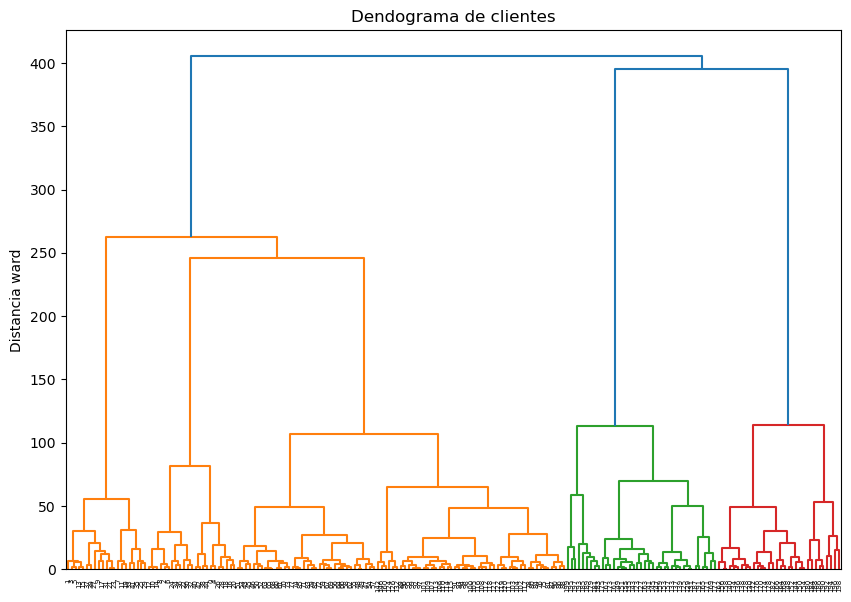

In [13]:
# Plot do dendograma do dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# dendograma. 
dend = shc.dendrogram(shc.linkage(matriz_df, method='ward')) 

Adicione uma linha horizontal para determinar o número de clusters - K

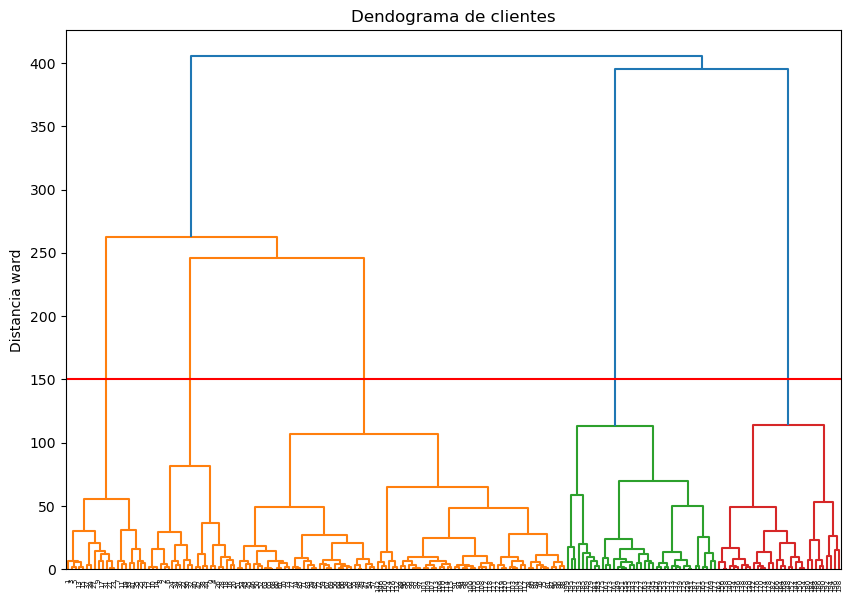

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

#dendograma com corte
dend = shc.dendrogram(shc.linkage(matriz_df, method='ward')) 
plt.axhline(150, c='r')

Observa-se que o corte cruza com 5 linhas verticais, isso significa que vamos usar o método de agrupamento hierárquico sklearn com n_clusters=5

In [15]:
from sklearn.cluster import AgglomerativeClustering

Agora aplicamos o método de agrupamento hierárquico (bottom-up) com 5 agrupamentos, a distância euclidiana para a afinidade e a distância ward para a ligação

In [16]:
# Criamos o modelo
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Ajustamos com os dados
cluster.fit_predict(matriz_df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Vamos ver como são os dados agrupados no espaço de feição

Text(0, 0.5, 'Gastos')

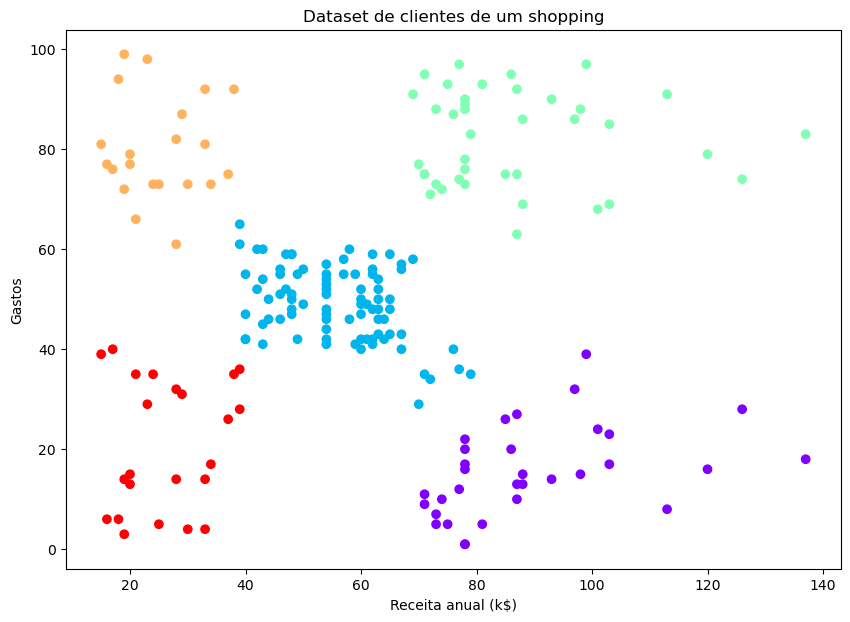

In [18]:
# Plotamos os dados no espaço de (Receitas, Despesas) com uma cor para cada um dos 5 grupos
plt.figure(figsize=(10, 7))
plt.title("Dataset de clientes de um shopping")
plt.scatter(matriz_df[:,0], matriz_df[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Receita anual (k$)")
plt.ylabel("Gastos")

**Percepções**:

O cluster violeta, no canto inferior direito, corresponde a clientes com altos salários, mas que gastam pouco no shopping. São clientes que gastam seu dinheiro com cuidado e não são propensos a desperdiçar. O cluster verde representa clientes com muito salário e que gastam muito em shopping centers. Sem dúvida, uma empresa deve impactar a publicidade para esses tipos de clientes porque eles são suscetíveis a compras. Por outro lado, o cluster azul claro é o de clientes 'médios'.

Que outras características podemos observar?